<font size='3'><b>SuperMarket Sales</b></font>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [10]:
df=pd.read_csv('supermarket_sales.csv',parse_dates=['Date'])

In [12]:
#basic info 
df.head()
df.tail()
df.sample()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [5]:
print(f'DataFrame has {df.shape[0]} rows and {df.shape[1]} columns')

DataFrame has 1000 rows and 17 columns


In [7]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [16]:
cat=[]
num=[]
for column in df.columns:
    if df[column].nunique()>10:
        num.append(column)
    else:
        cat.append(column)

In [22]:
#Find aggregate sales among branches 


<Axes: xlabel='Branch', ylabel='count'>

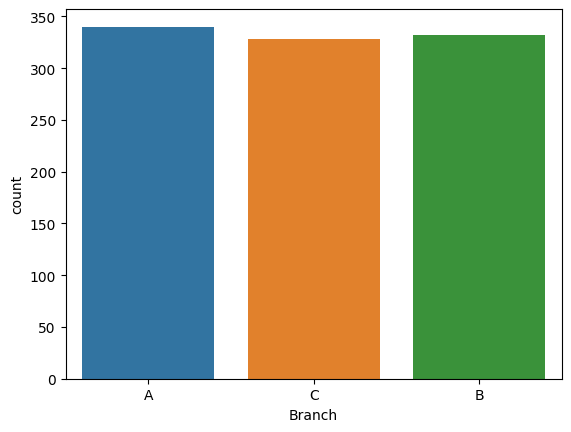

In [23]:
sns.countplot(data=df,x='Branch',hue='Branch')

In [27]:
df['Branch'].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

In [28]:
#Most popular method of payment
df['Payment'].value_counts()


Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

<Axes: xlabel='Payment', ylabel='count'>

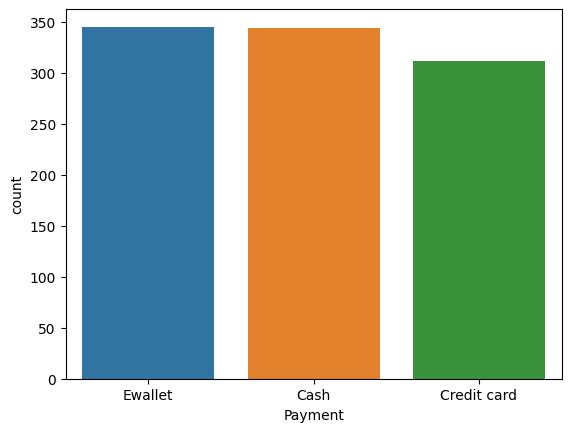

In [30]:
sns.countplot(data=df,x='Payment',hue='Payment')

In [34]:
#Distribution of customer rating 
num

['Invoice ID',
 'Unit price',
 'Tax 5%',
 'Total',
 'Date',
 'Time',
 'cogs',
 'gross income',
 'Rating']

<Axes: xlabel='Rating', ylabel='Count'>

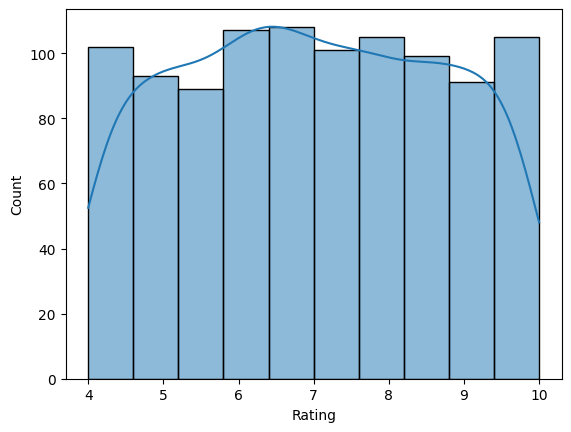

In [39]:
sns.histplot(data=df,x='Rating',bins=10,kde=True)

In [44]:
df['Rating'].skew()

np.float64(0.00900964876573073)

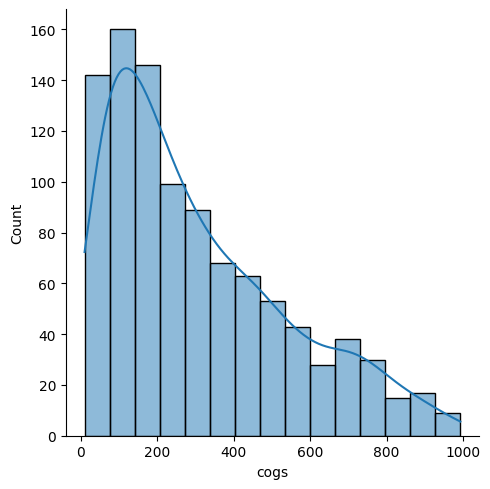

In [49]:
#Distribution of cost of goods
sns.displot(data=df,x='cogs',kde=True)

In [51]:
df['cogs'].skew()

np.float64(0.8925698049581418)

<Axes: xlabel='cogs'>

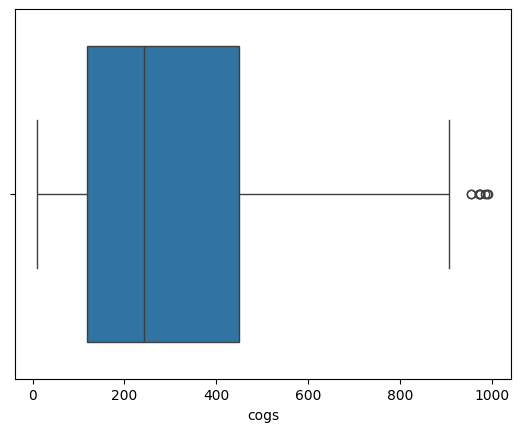

In [52]:
sns.boxplot(data=df,x='cogs')

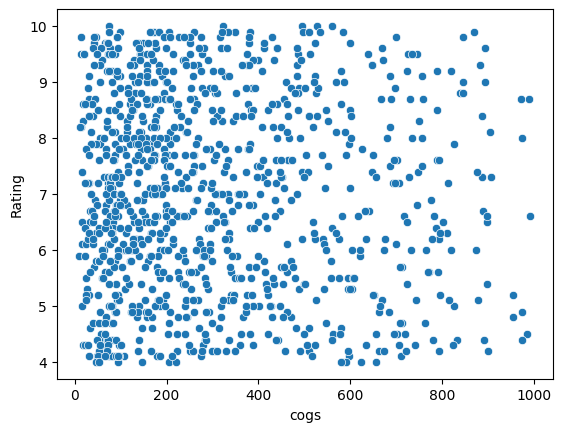

In [55]:
#Bivarate analysis 
#Does the cogs affects the ratings ?
sns.scatterplot(data=df,x='cogs',y='Rating');
#No

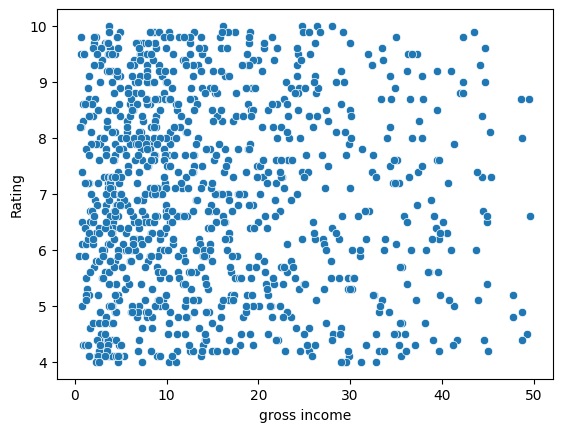

In [56]:
#does the gross income affects ratings?
sns.scatterplot(data=df,x='gross income',y='Rating');
#neither

<Axes: xlabel='Branch', ylabel='gross income'>

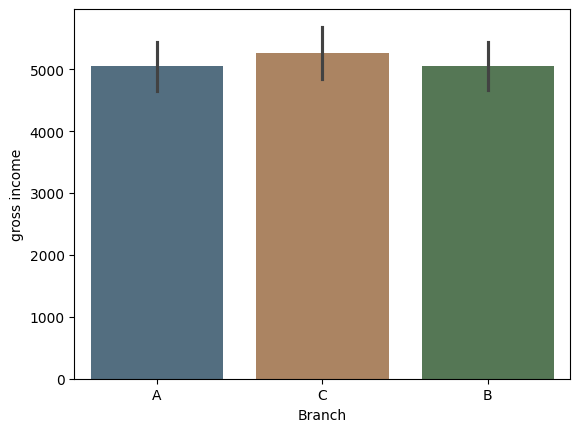

In [60]:
#Most profitable branch as per gross income 
sns.barplot(data=df,x='Branch',y='gross income',estimator='sum',hue='Branch',legend=False,saturation=0.3,palette='tab10')

<Axes: xlabel='Branch', ylabel='gross income'>

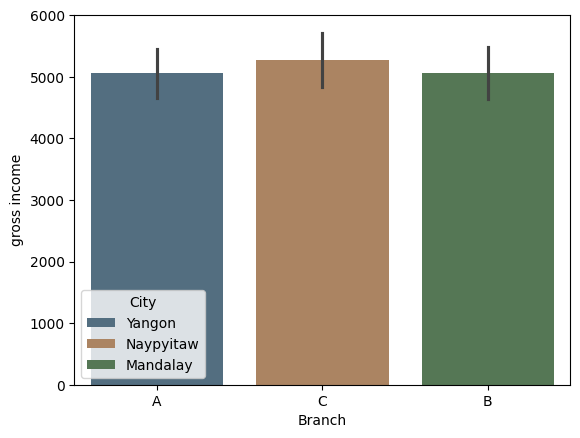

In [64]:
#Multivariate
sns.barplot(data=df,x='Branch',y='gross income',estimator='sum',hue='City',legend=True,saturation=0.3,palette='tab10')

In [65]:
#Gender-Gross income relationship
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='gross income'>

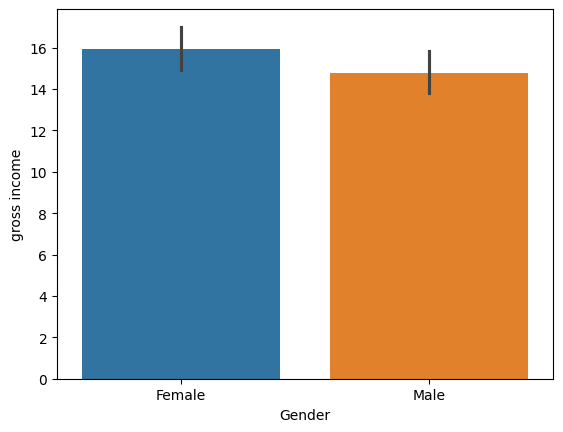

In [69]:
sns.barplot(data=df,x='Gender',y='gross income',hue='Gender',legend=False,estimator='mean')

<Axes: xlabel='Gender', ylabel='gross income'>

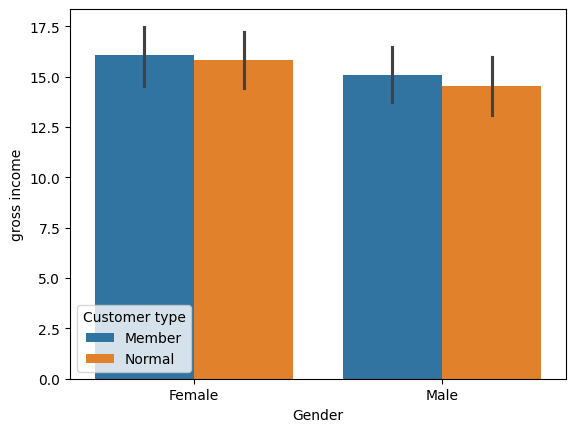

In [71]:
sns.barplot(data=df,x='Gender',y='gross income',hue='Customer type',estimator='mean')

In [72]:
#product that generates the most income 
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [74]:
df['Product line'].value_counts()

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Health and beauty'),
  Text(1, 0, 'Electronic accessories'),
  Text(2, 0, 'Home and lifestyle'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Food and beverages'),
  Text(5, 0, 'Fashion accessories')])

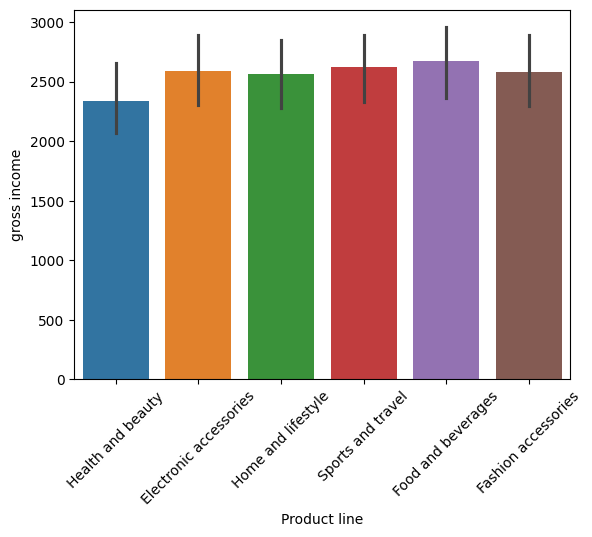

In [78]:
sns.barplot(data=df,x='Product line',y='gross income',estimator='sum',hue='Product line',legend=False,palette='tab10')
plt.xticks(rotation=45)

In [85]:
#find the highest unit price in the product line 
df.groupby('Product line')['Unit price'].max().sort_values(ascending=False)

Product line
Health and beauty         99.96
Sports and travel         99.96
Home and lifestyle        99.92
Fashion accessories       99.89
Food and beverages        99.79
Electronic accessories    99.73
Name: Unit price, dtype: float64

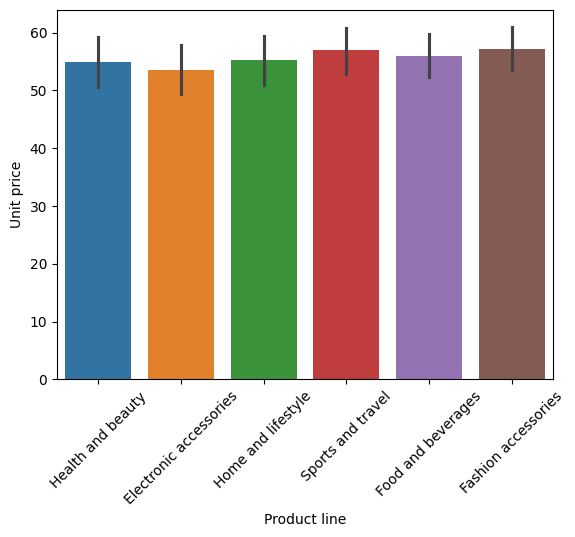

In [83]:
#find which product line has the highest unit price
sns.barplot(data=df,x='Product line',y='Unit price',estimator='mean',hue='Product line',legend=False,palette='tab10')
plt.xticks(rotation=45)
plt.show()

In [86]:
#Find differend payment methods used by customers,citywise
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [87]:
pd.crosstab(index=df['City'],columns=df['Payment'])

Payment,Cash,Credit card,Ewallet
City,,,
Mandalay,110,109,113
Naypyitaw,124,98,106
Yangon,110,104,126


<Axes: xlabel='Payment', ylabel='City'>

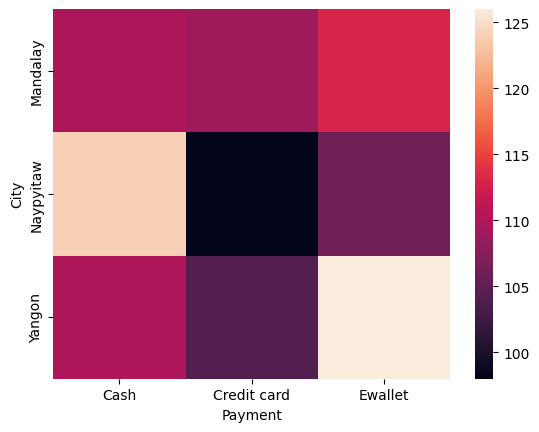

In [90]:
sns.heatmap(pd.crosstab(index=df['City'],columns=df['Payment']))

In [92]:
#Which product line is purchased in the highest quantity
df.groupby('Product line')['Quantity'].sum()

Product line
Electronic accessories    971
Fashion accessories       902
Food and beverages        952
Health and beauty         854
Home and lifestyle        911
Sports and travel         920
Name: Quantity, dtype: int64

In [95]:
df.groupby('Product line')['Quantity'].sum()

Product line
Electronic accessories    971
Fashion accessories       902
Food and beverages        952
Health and beauty         854
Home and lifestyle        911
Sports and travel         920
Name: Quantity, dtype: int64

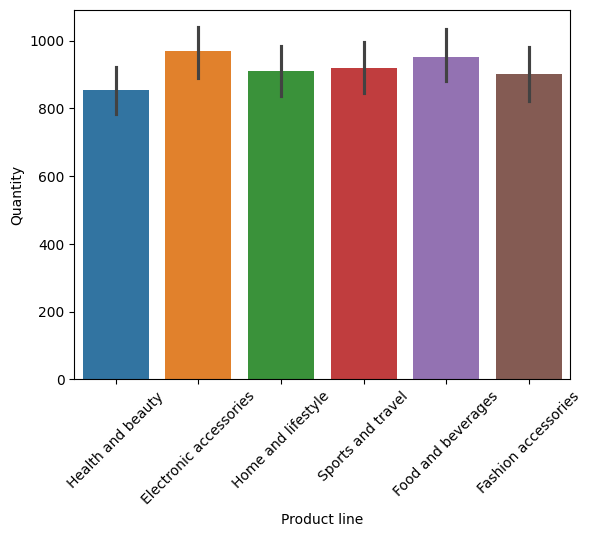

In [96]:
sns.barplot(data=df,x='Product line',y='Quantity',estimator='sum',legend=False,hue='Product line')
plt.xticks(rotation=45)
plt.show()

In [99]:
#display daily sales by day off the week 
df['Date'].dt.dayofweek

0      5
1      4
2      6
3      6
4      4
      ..
995    1
996    5
997    5
998    4
999    0
Name: Date, Length: 1000, dtype: int32

In [100]:
dw={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [102]:
df['Day']=df['Date'].dt.dayofweek.map(dw)

In [104]:
df['Day'].value_counts()

Day
Sat    164
Tue    158
Wed    143
Fri    139
Thu    138
Sun    133
Mon    125
Name: count, dtype: int64

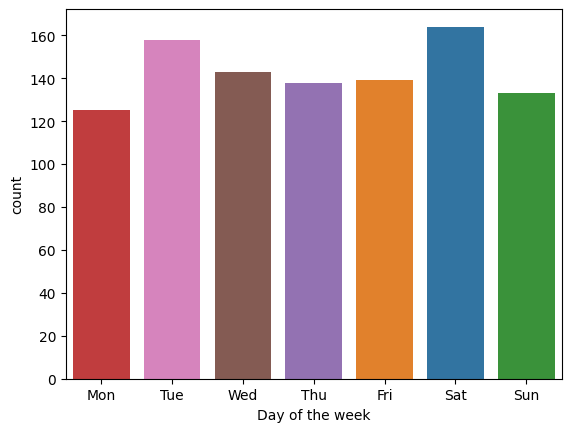

In [122]:
sns.countplot(data=df,x='Day',hue='Day',order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Day of the week')
plt.show()

In [114]:
#highest months by sales
df['Date'].dt.month.value_counts()

Date
1    352
3    345
2    303
Name: count, dtype: int64

In [115]:
dm={1:'January',2:'February',3:'March'}

In [116]:
df['Month']=df['Date'].dt.month.map(dm)

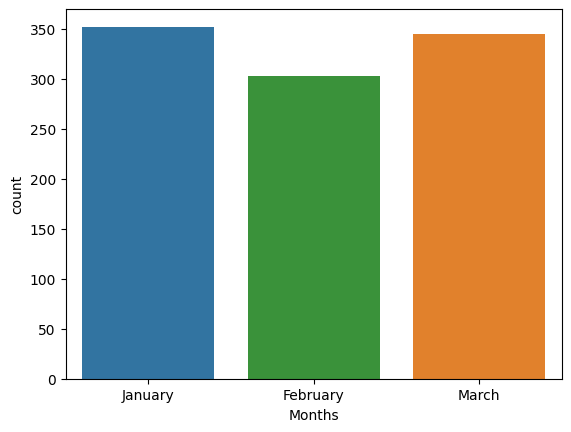

In [121]:
sns.countplot(data=df,x='Month',hue='Month',order=['January','February','March'])
plt.xlabel('Months')
plt.show()